# Perseptron

<p align=”justify”>Seperti yang telah saya jabarkan pada bagian sebelumnya, pada dasarnya perseptron merupakan sel saraf tunggal tiruan yang merupakan bangunan dasar dari algoritma ANN. Proses kerja perseptron cukup sederhana, yakni menerima <i>input</i>, kemudian melakukan komputasi terhadap <i>input</i> numerik tersebut dengan menggunakan fungsi aktifasi (linier, <i>symetric-saturating linear</i>, log sigmoid, tangen sigmoid, atau <i>radial basis</i> (Araghinejad, 2014)), kemudian menghasilkan satu <i>output</i> yang dapat diteruskan ke perseptron pada lapisan selanjutnya sebagai <i>input</i>.</p>

<p align=”justify”>Pada bagian ini kita hanya akan membahas cara kerja perseptron tunggal menggunakan NeuroLab. Untuk mengawalinya kita harus mengimpor beberapa pustaka sebagai berikut:</p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl
plt.xkcd() # biar lucu
plt.style.use('ggplot') # karena saya pengguna R juga biar bagus, Bro plotnya!
%matplotlib inline

Kemudian kita mendefinisikan dataset sederhana dalam bentuk `ndarray` dengan 2 fitur dan 1 label:

In [2]:
dataset = np.array([[.22,.34,0],
                    [.23,.37,0],
                    [.25,.31,0], 
                    [.76,.19,1],
                    [.84,.14,1]])

Lakukan pemisahan fitur dan label dengan menggunakan perintah sebagai berikut:

In [3]:
fitur = dataset[:,:2]
label = dataset[:,2].reshape(dataset.shape[0],1) # konversi ke vektor kolom

Untuk melihat *input* dari dataset sederhana ini, baiknya kita tampilkan secara visual:

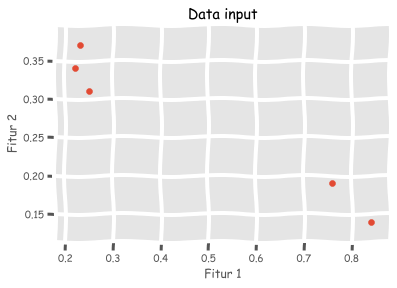

In [4]:
plt.scatter(fitur[:,0], fitur[:,1]);
plt.xlabel('Fitur 1');
plt.ylabel('Fitur 2');
plt.title('Data input');

Kemudian kita mulai kegiatan pra-pemrosesan data dengan mengatur nilai fitur minimum dan maksimum:

In [5]:
fit1_min, fit1_maks, fit2_min, fit2_maks = 0, 1, 0, 1 
fit1 = [fit1_min, fit1_maks]
fit2 = [fit2_min, fit2_maks]

Lalu kita definisikan <i>output</i> yang kita inginkan, yakni hanya berupa perseptron tunggal:

In [6]:
output = label.shape[1]
output

1

Kemudian kita definisikan model perseptron tunggal dengan menggunakan fungsi <a href="https:https://pythonhosted.org/neurolab/ex_newp.html"><code>newp</code></a>:

In [7]:
perseptron = nl.net.newp([fit1,fit2], output)

Untuk meminimalkan galat, kita perlu melakukan *training* pada model ini untuk mencapai *learning rate* 0,01:

In [8]:
progres_galat = perseptron.train(fitur, label, epochs=100, show=20, lr=.01)

The goal of learning is reached


Kemudian kita visualisasikan hasil *training*-nya:

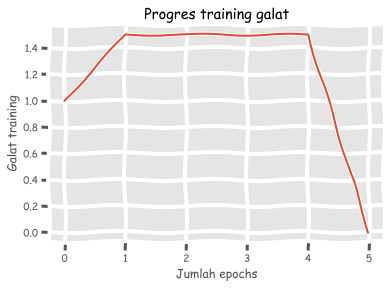

In [9]:
plt.plot(progres_galat);
plt.xlabel('Jumlah epochs');
plt.ylabel('Galat training');
plt.title('Progres training galat');

Proses *training* hanya berlangsung dalam lima *epochs* karena jumlah data yang sedikit. Karena model ini sudah *mantap*, maka saatnya kita membuat prediksi:

In [10]:
# fitur 1 = 0,8; fitur 2 = 0,2
perseptron.sim([[.8,.2]])

array([[1.]])

In [11]:
# fitur 1 = 0,3; fitur 2 = 0,4
perseptron.sim([[.2,.4]])

array([[0.]])

<p align=”justify”> Patut kita ingat di sini saya tidak melakukan penilaian performa seperti yang umum dilakukan ketika kita hendak menerapkan model pemelajaran mesin seperti: <i>train - test splitting</i>, <i>scaling</i> fitur, <i>cross-validation</i>, dll karena jumlah data yang sangat kecil.</p>